Importing the Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset to pandas dataframe
df = pd.read_csv("/content/sample_data/Car_Price_Prediction Dataset.csv")

Dataset Visualization

In [3]:
# printing first 5 rows
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# printing last five rows
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [5]:
# shape of dataset
df.shape

(6019, 14)

In [7]:
# columns of the dataset
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [8]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [9]:
# describing the coumns that contains numerical data
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


Null Values Treatment

In [10]:
# checking the null values
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

<AxesSubplot:>

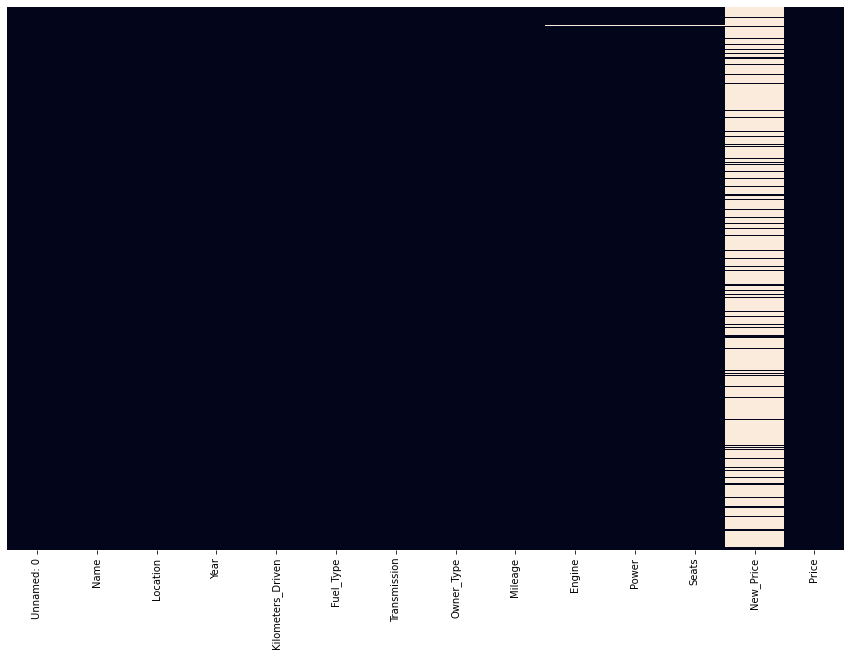

In [14]:
# heatmap for the null values
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [15]:
# dropping the New_Price Column as it contains many null values
df.drop(['New_Price'],axis=1,inplace=True)

In [17]:
# dropping the columns that are not required
df.drop(['Unnamed: 0','Name','Location'],axis=1,inplace=True)

In [18]:
# As Engine, Power, Seats and Mileage contains less null values. So we drop rows that contains null values
df.dropna(inplace = True)

In [21]:
df=df[df["Power"].str.contains("null")==False]

In [22]:
# shape of dataset
df.shape

(5872, 10)

In [23]:
# checking the null values
df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [53]:
# dataset free from null values
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75
1,2015,41000,1,1,0,19.67,1582,126.20,5.0,12.50
2,2011,46000,3,1,0,18.20,1199,88.70,5.0,4.50
3,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74


Data Visualization

<AxesSubplot:xlabel='Seats', ylabel='count'>

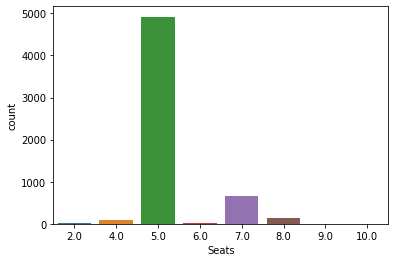

In [25]:
sns.countplot(data=df,x='Seats')

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

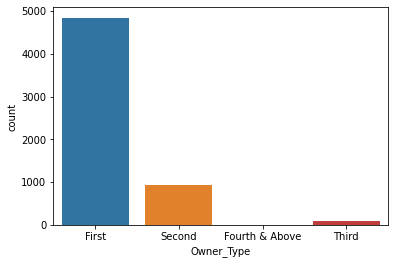

In [26]:
sns.countplot(data=df,x='Owner_Type')

<AxesSubplot:xlabel='Transmission', ylabel='count'>

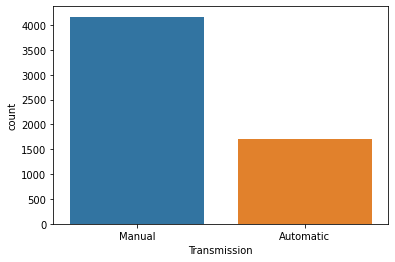

In [27]:
sns.countplot(data=df,x='Transmission')

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

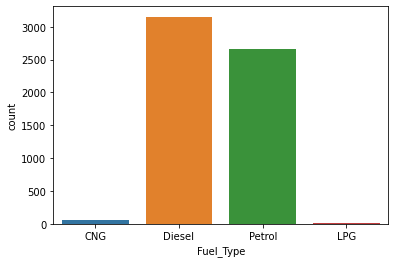

In [32]:
sns.countplot(data=df, x='Fuel_Type')

Using Dummies and LabelEncoder

In [28]:
# unique values in Transmission
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [29]:
# converting into dummies
trans_mission=pd.get_dummies(df['Transmission'],drop_first=True)
print(trans_mission.head())

   Manual
0       1
1       1
2       1
3       1
4       0


In [30]:
# storing the converted values
df['Transmission'] = trans_mission

In [31]:
# unique value for Fuel_Type
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [33]:
# importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()

In [35]:
df['Fuel_Type']=encoder.fit_transform(df['Fuel_Type'])
# It returns:
# 0 -> CNG
# 1 -> Disel
# 2 -> LPG
# 3 -> Petrol

In [36]:
# unique value for Owner_Type
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [37]:
encoder = LabelEncoder()
df['Owner_Type'] = encoder.fit_transform(df['Owner_Type'])
# 0 -> First
# 1 -> Fourth & Above
# 2 -> Second
# 3 -> Third

In [38]:
# printing the dataset to check
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,3,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Removing the Subscripts of Columns

In [42]:
df['Power']=df['Power'].str.replace('bhp','')
df['Engine']=df['Engine'].str.replace('CC','')
df['Mileage']=df['Mileage'].str.replace('kmpl','')
df['Mileage']=df['Mileage'].str.replace('km/kg','')

In [40]:
# printing the dataset
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,1,0,26.6,998,58.16,5.0,1.75
1,2015,41000,1,1,0,19.67,1582,126.2,5.0,12.50
2,2011,46000,3,1,0,18.2,1199,88.7,5.0,4.50
3,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,2013,40670,1,0,2,15.2,1968,140.8,5.0,17.74


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   int64  
 3   Transmission       5872 non-null   uint8  
 4   Owner_Type         5872 non-null   int64  
 5   Mileage            5872 non-null   object 
 6   Engine             5872 non-null   object 
 7   Power              5872 non-null   object 
 8   Seats              5872 non-null   float64
 9   Price              5872 non-null   float64
dtypes: float64(2), int64(4), object(3), uint8(1)
memory usage: 593.5+ KB


Converting every Datatype to Integer or Float

In [44]:
df['Engine']=df['Engine'].astype(str).astype(int)            # object -> Integer
df['Power'] = pd.to_numeric(df['Power'])                     # object -> Float
df['Mileage']=pd.to_numeric(df['Mileage'])                   # object -> Float

Viewing and Saving the Cleaned Dataset

In [45]:
# Cleaned Dataset
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75
1,2015,41000,1,1,0,19.67,1582,126.20,5.0,12.50
2,2011,46000,3,1,0,18.20,1199,88.70,5.0,4.50
3,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74


In [74]:
df = df.to_csv("/content/sample_data/Car_Price_Prediction Dataset.csv")

In [48]:
df1 = pd.read_csv("/content/sample_data/Car_Price_Prediction Dataset.csv")

In [49]:
cleaned_dataset = pd.concat([df1])

In [51]:
cleaned_dataset.to_csv("Cleaned_Dataset.csv")

EDA on Cleaned Datset

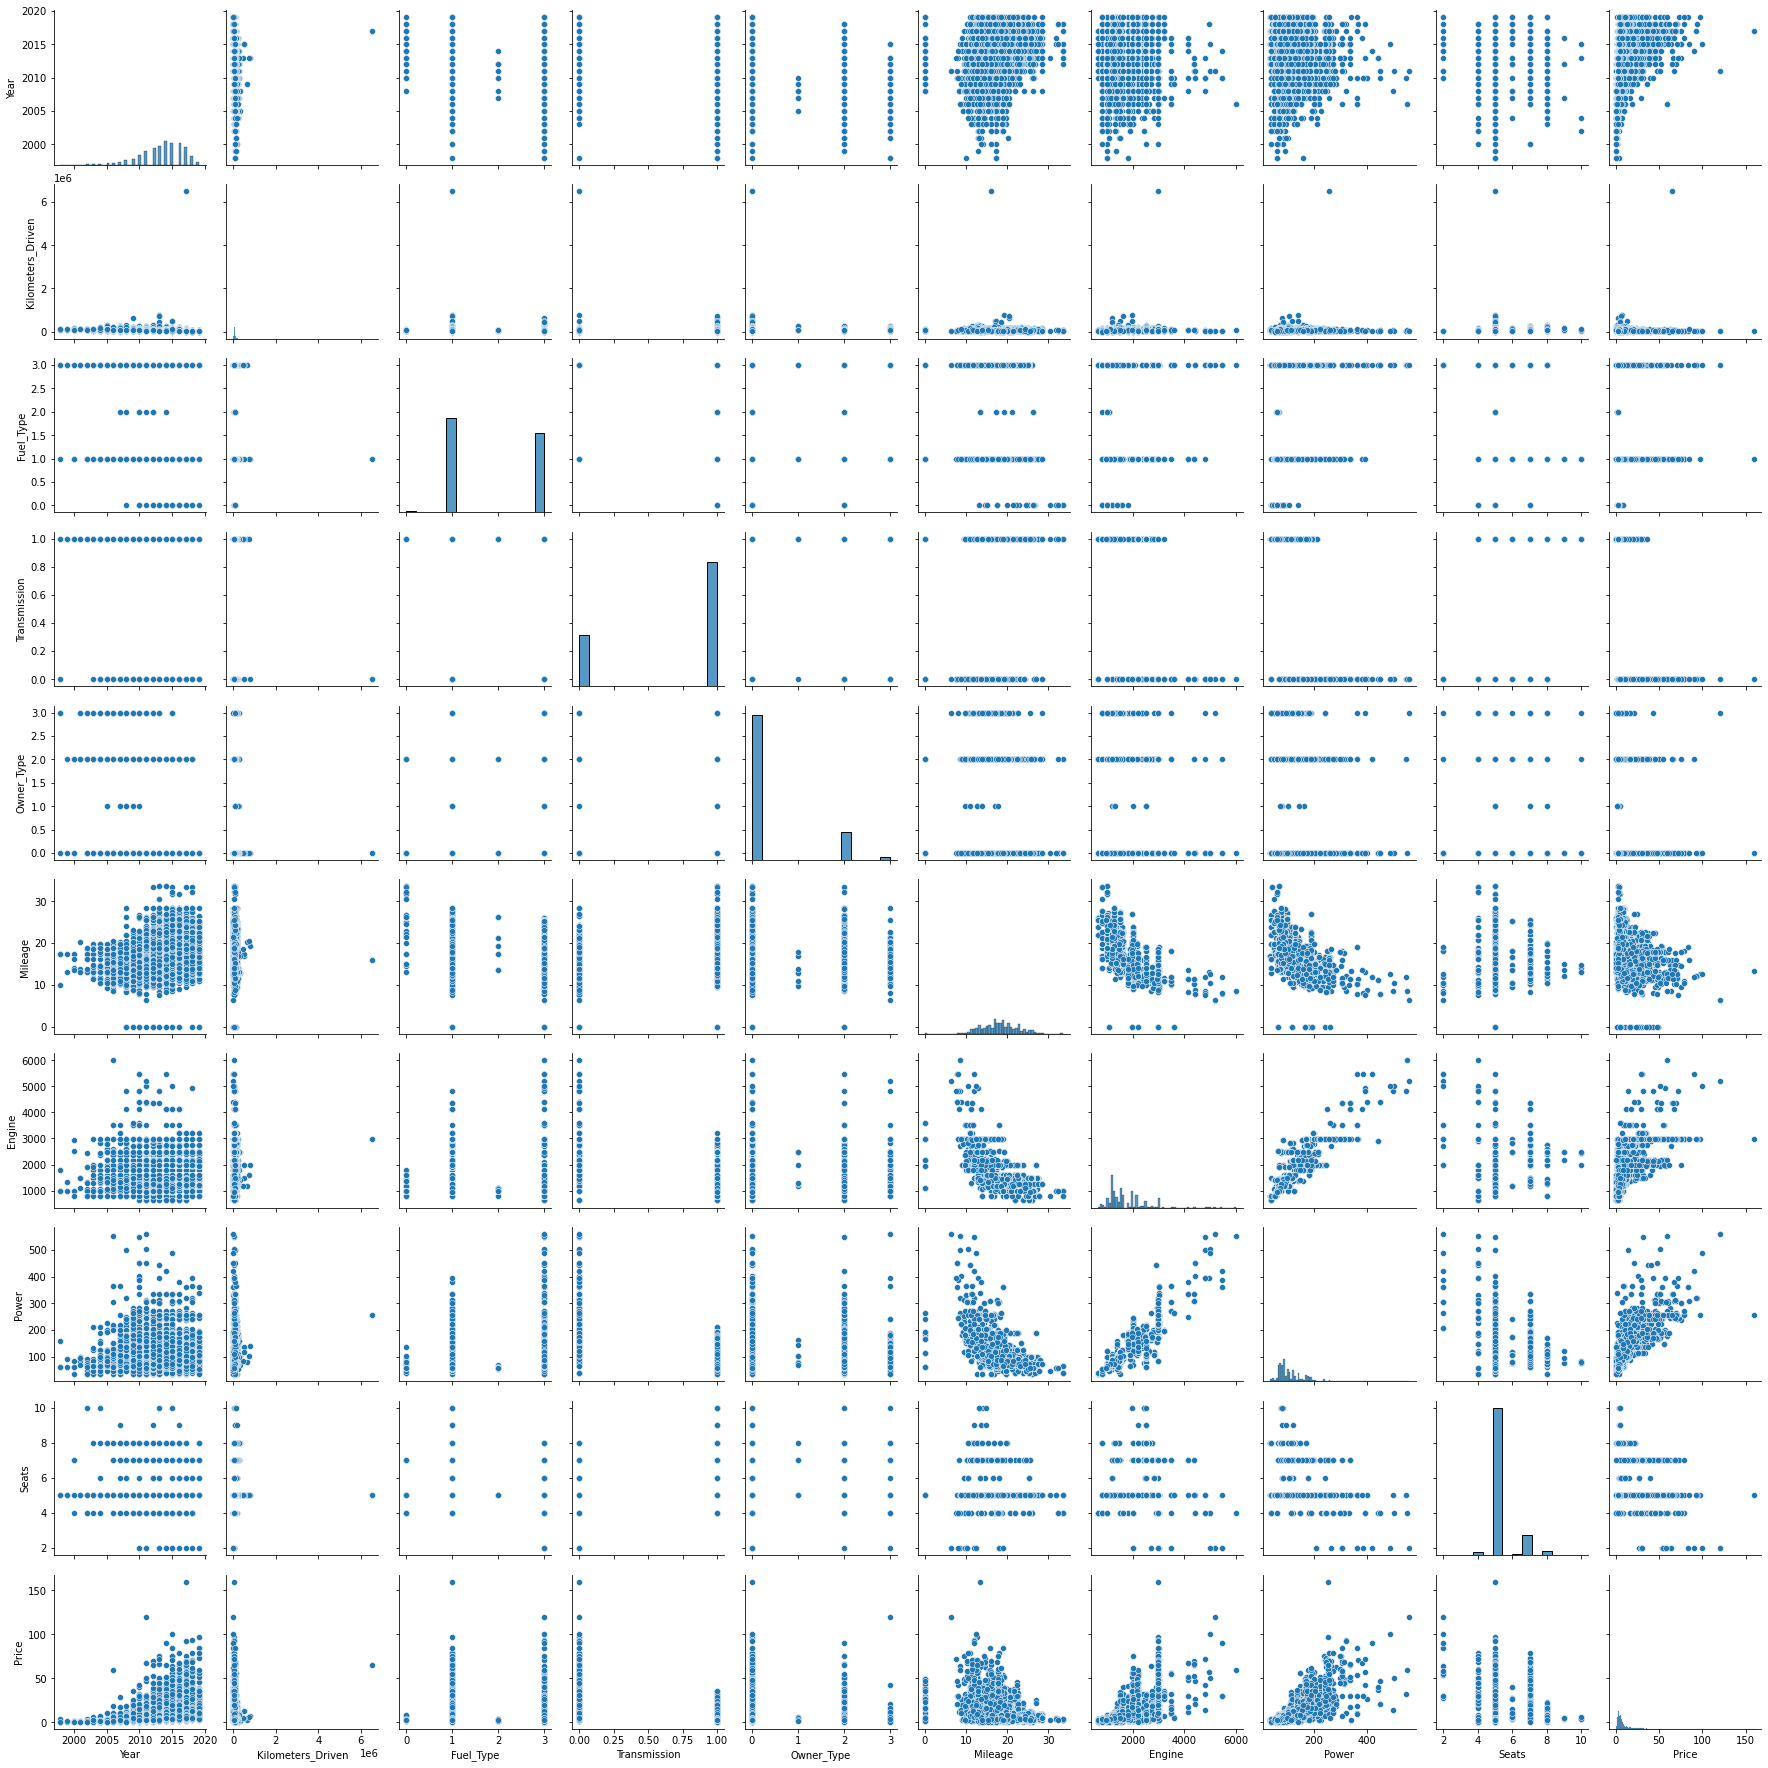

In [52]:
sns.pairplot(df)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Power'>

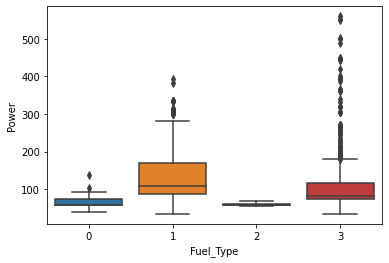

In [54]:
sns.boxplot(x='Fuel_Type',y='Power',data=df)

<AxesSubplot:xlabel='Year', ylabel='Fuel_Type'>

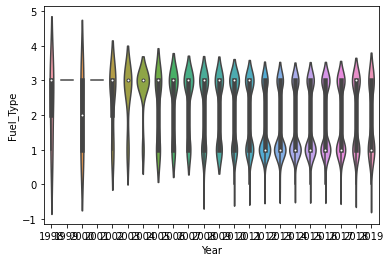

In [55]:
sns.violinplot(x="Year",y="Fuel_Type",data=df)

In [56]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

Decision Tree Regression Model

In [57]:
predict = "Price"
df = df[['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [58]:
x = np.array(df.drop([predict], 1))
y = np.array(df[predict])

<ipython-input-58-ec99edb02a54>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop([predict], 1))


In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [68]:
from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

1.0

In [73]:
a=int(input("Year: "))
b=int(input("Kilometers_Driven: "))
c=int(input("Fuel_Type: "))
d=int(input("Transmission: "))
e=int(input("Owner_Type: "))
f=float(input("Mileage: "))
g=int(input("Engine: "))
h=float(input("Power: "))
i=float(input("Seats: "))

input_data=(a,b,c,d,e,f,g,h,i)
arr= np.asarray(input_data).reshape(1,-1)
prediction=model.predict(arr)
print("The value of car in lakhs should be approx Rs ",prediction)

Year in yyyy format2011
	Kilometers_Driven46000
	Fuel_Type -0 for Cng ,1 for Diesel,2 for lpg and 3 for petrol3
	Transmission - 0 for automatic and 1 for manual1
	Owner_Type - 0 for first , 1 for fourth & above , 2 for second and 3 for third0
	Mileage 18.20
	Engine1199
	Power88.70
	Seats-2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.05.0
The value of car in lakhs should be approx Rs  [4.5]
